In [8]:
# Importing pandas and sklearn to visualize the data and to split the data as a training/test split set
import csv
import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [9]:
# Loading data as a pandas dataframe
data = pd.read_csv("dataset1.csv") 
# Shows the first 10 instances of the dataset
data[0:10]


,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
5,loose stop overthinking everything ruin friend...,INTJ
6,often men one put chance get burn otherwise no...,INTJ
7,early definitely relate quiet self destruction...,INTJ
8,one full list would impossibly long quotable f...,INTJ
9,technique information power share unless absol...,INTJ


In [10]:
#only keep first cariable of the target (type)
for index, row in data.iterrows():
    row['type'] = row['type'][0]

# Shows the first 10 instances of the dataset
data[0:10]

,posts,type
0,know intj tool use interaction people excuse a...,I
1,rap music ehh opp yeah know valid well know fa...,I
2,preferably p hd low except wew lad video p min...,I
3,drink like wish could drink red wine give head...,I
4,space program ah bad deal meing freelance max ...,I
5,loose stop overthinking everything ruin friend...,I
6,often men one put chance get burn otherwise no...,I
7,early definitely relate quiet self destruction...,I
8,one full list would impossibly long quotable f...,I
9,technique information power share unless absol...,I


I    80677
E    25390
Name: type, dtype: int64

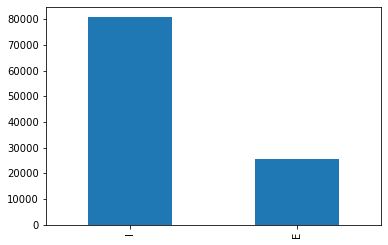

In [11]:
# Counting the class frequencies to search for the class proportions in case of class imbalance
data['type'].value_counts().plot.bar(x='type', y='Frequency')

# A bar plot of the class distribution
data['type'].value_counts()
# Observation: A right skewed distribution, which is not quite similar to the actual distribution of the population


In [12]:
# Preprocessing (removing stopwords)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = set(stopwords.words("english"))

# Length per sentence before removal
INDEX = 0


for sentence in data["posts"]:
    tokenized_sentence = word_tokenize(sentence)
    data["posts"].loc[INDEX] = tokenized_sentence
    INDEX +=1
    
for sentence in data["posts"]:          
    for word in stopwords:
        if word in sentence:
            sentence.remove(word)


            

        
    
    
    

    



    

 




In [13]:
# Length per sentence after removal
minimum = 1000
for i in data["posts"]:
    if len(i) < minimum:
        minimum = len(i)
    
print(minimum)
# Minimum is 478


478


In [14]:
NUMBER = 0
# Fix list length to the minimum
for sentence in data["posts"]:
    data["posts"].loc[NUMBER] = sentence[0:minimum+1]
    NUMBER += 1

for item in data["posts"][0:100]:
    print(len(item))
    
    

479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479
479


In [15]:
# Splitting the data 90/10
posts_train, posts_test, type_train, type_test = train_test_split(data["posts"], data["type"],test_size= 0.1)

In [16]:
# Converting the dataframes to csv 
pd.concat([posts_train, type_train], axis=1).to_csv("training_90_string.csv", index=False)
pd.concat([posts_test, type_test], axis=1).to_csv("test_10.csv", index=False)